# Gradient Descent

Gradient Descent is an optimization algorithm which is commonly used in Machine Learning. It is used to minimize a function. When we give a function with a set of parameters, the algorithm iteratively moves towards a set of parameter values that minimizes the function. This is achieved by using partial deriviatives.

![Gradient Descent](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png)

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline

### Loading the dataset

This is a sample dataset. I will be showing the gradient descent using Linear Regression.
Our dataset consist of 100 data points. 

In [2]:
points = np.genfromtxt('data.csv', delimiter = ',')
points.shape

(100, 2)

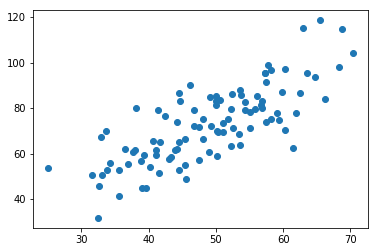

In [3]:
plt.scatter(x=points[:,0], y=points[:,1])

We want to find a line which fits best for this graph. To plot this line we use the line equation $ y = mx + b $.
Here $ m $ is the slope and $ b $ is y-intercept. We need to find m and b so that we can find the line which fits this data well

### Sum of Squared Error

A standard approach for this type of problem is to define an error function(also known as cost funtion). We can find this by using a sum of squared error method. In this method we take the distance between the data point and the line and square it. This can be expressed mathematically as ![title](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)
Our aim is to minimize this error. We use gradient descent to minimize this function. The best fit for our data will be for the line which have the lowest error function. So we need to find the optimal $m$ and $b$ for our line equation
The code to compute the error function is given below

In [4]:
def SSE(m, b, data):
    
    total_error = 0.0
    
    for i in range(len(data)):
        
        x = data[i, 0]
        y = data[i, 1]
        
        target = y
        output = m * x + b
        
        squared_error = (target - output) ** 2
        
        total_error += squared_error
        
    sse = total_error / len(data)
    
    return sse

### Gradient Descent

We want to minimize the error function using gradient descent.
For fing this we need to give the initial $m$ and $b$ value to the function. It then computes the partial deriviative of $m$ and $b$. The mathematical equation for this is ![title](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)
How big steps is taken in the dirction of minimum is determined using Learning rate. It determines how fast or slow we move towards the optimal minimum. When specifying the learning rate it should not be too large as well not too small. It it is too large it may step over the local minimum and if it is too small it will take forever to reach the minimum. ![title](https://cdn-images-1.medium.com/max/800/0*QwE8M4MupSdqA3M4.png)

So after finding the partial deriviative we should compute the new $m$ and $b$ as

$ m\_updated = m - learning\_rate * m\_gradient$

$ b\_updated = b - learning\_rate * b\_gradient$

In [5]:
def gradient_descent(m, b, learning_rate, data):
    
    N = len(data)
    m_grad = 0
    b_grad = 0
    
    for i in range(N):
        
        x = data[i,0]
        y = data[i,1]
        
        m_grad += - ((2 / N) * x * (y - (m * x + b)))
        b_grad += - ((2 / N) * (y - (m * x + b)))
        
    m_updated = m - learning_rate * m_grad
    b_updated = b - learning_rate * b_grad
    
    return m_updated, b_updated

One iteration of the above may not give the minimum. We may need to run it for n steps. For that we use below function.

In [6]:
def gradient_descent_n_steps(m_starting, b_starting, learning_rate, data, steps):
    
    print('Starting line: y = %.6fx + %.6f - Error: %.6f\n' % (m_starting, b_starting, SSE(m_starting, b_starting, data)))
    
    m = m_starting
    b = b_starting
    display_freq = steps//10
    
    for i in range(steps):
        
        m,b = gradient_descent(m, b, learning_rate, data)
        
        if(i % display_freq == 0):
            sse = SSE(m, b, data)
            print('At step %d - Line: y = %.6fx + %.6f - Error: %.6f' %(i+1, m, b, sse))
    
    print('\nBest  line: y = %.6fx + %.6f - Error: %.6f' %(m,b,sse))
    return m,b

### Train

Lets define our hyperparameters and plot the graph before training it

In [7]:
initial_m = 0
initial_b = 0
learning_rate = 0.0001

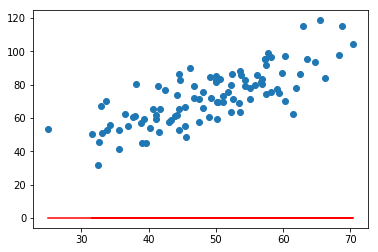

In [8]:
plt.scatter(x = points[:,0], y = points[:,1])
plt.plot(points[:,0], initial_m * points[:,0] + initial_b, color='red')

In [9]:
m, b = gradient_descent_n_steps(initial_m, initial_b, learning_rate, points, 20)

Starting line: y = 0.000000x + 0.000000 - Error: 5565.107834

At step 1 - Line: y = 0.737070x + 0.014547 - Error: 1484.586557
At step 3 - Line: y = 1.292255x + 0.025579 - Error: 199.509986
At step 5 - Line: y = 1.431947x + 0.028445 - Error: 118.149693
At step 7 - Line: y = 1.467095x + 0.029256 - Error: 112.998577
At step 9 - Line: y = 1.475937x + 0.029550 - Error: 112.672384
At step 11 - Line: y = 1.478160x + 0.029714 - Error: 112.651665
At step 13 - Line: y = 1.478717x + 0.029845 - Error: 112.650285
At step 15 - Line: y = 1.478856x + 0.029968 - Error: 112.650130
At step 17 - Line: y = 1.478889x + 0.030089 - Error: 112.650053
At step 19 - Line: y = 1.478895x + 0.030209 - Error: 112.649980

Best  line: y = 1.478896x + 0.030270 - Error: 112.649980


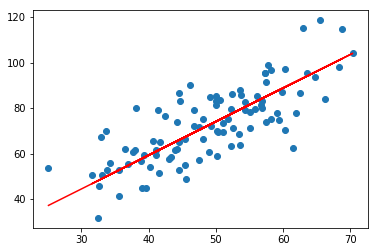

In [10]:
plt.scatter(x = points[:,0], y = points[:,1])
plt.plot(points[:,0], m * points[:,0] + b, color='red')

Now we have found the optimal $m$ and $b$, so that our model has less error

## Visualization

In [11]:
%matplotlib notebook

def make_plots(fig,axes,m_list,b_list,m,b,data,step):
    
    #PLOT1
    ax = axes[1]
    ax.set_xlim(0,100)
    ax.set_ylim(0,150)
    
    ax.scatter(x=data[:,0],y=data[:,1])
    ax.plot(data[:,0], m*data[:,0] + b,color='red')
    
    #PLOT2
    ax2 = axes[0]
    ax2.cla()
    
    ax2.set_title('Gradient Search')
    ax2.set_xlim(0,1.6)
    ax2.set_ylim(0,0.2)
    ax2.set_xlabel('slope (m)')
    ax2.set_ylabel('y intercept (b)')
    
    ax2.text(-1.15, 0.97, 'Iteration: '+str(step),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    ax2.text(-1.15, 0.93, 'm = '+str(round(m,3))+', b = '+str(round(b,3)),
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='dimgrey', fontsize=10)
    
    ax2.plot(m_list,b_list,color='black',linewidth=0.5)
    ax2.scatter(m,b,marker='^')   
    
    fig.canvas.draw()
    

def gradient_descent_n_steps_with_plot(m_starting,b_starting,learning_rate,data,steps): 
    
    fig,axes = plt.subplots(1,2,figsize=(10,7))
    
    m_list = [m_starting]
    b_list = [b_starting]
    m = m_starting
    b = b_starting
    plt.cla()
    for i in range(steps):
        step = i
        make_plots(fig,axes,m_list,b_list,m,b,data,step)
        
        m,b = gradient_descent(m,b,learning_rate,data)
        m_list.append(m)
        b_list.append(b)
        
        time.sleep(10/steps)
        plt.cla()
            
    make_plots(fig,axes,m_list,b_list,m,b,data,step)

<IPython.core.display.Javascript object>


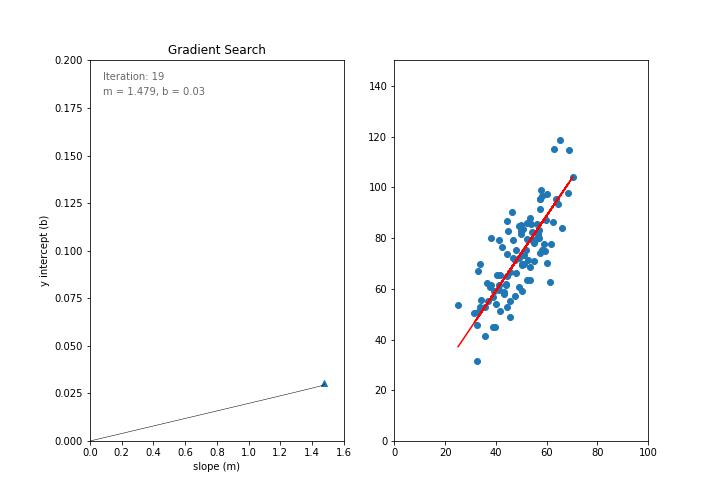

<IPython.core.display.Javascript object>


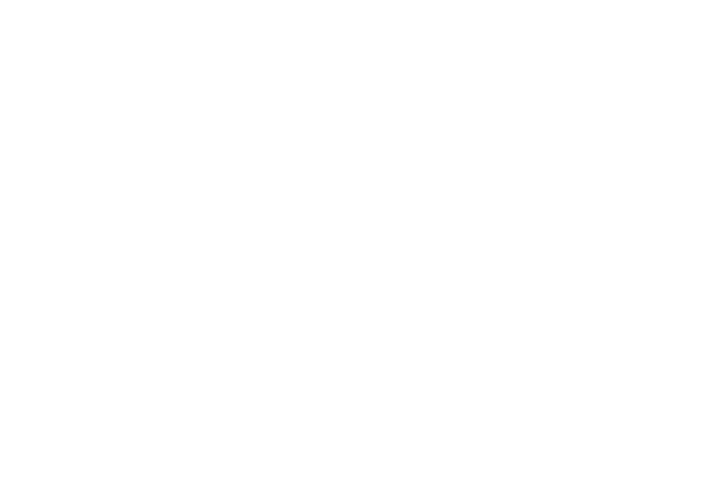

In [12]:
m = 0
b = 0
learning_rate = 0.0001
steps = 20
gradient_descent_n_steps_with_plot(m,b,learning_rate,points,steps)

<IPython.core.display.Javascript object>


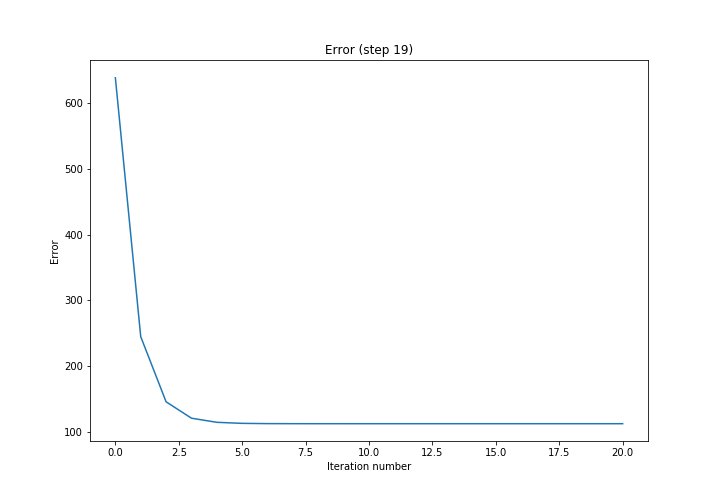

<IPython.core.display.Javascript object>


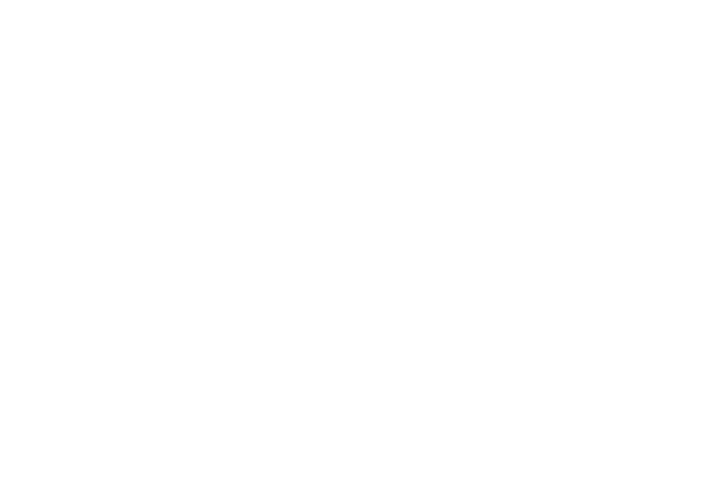

In [13]:
def error_plot(fig,ax,error_list,error,data,step):

    ax.cla()
    
    ax.set_title('Error (step %d)' % step)
    ax.set_xlabel('Iteration number')
    ax.set_ylabel('Error')
    
    ax.plot(np.arange(0,len(error_list)),error_list)    
    fig.canvas.draw()
    
def gradient_descent_n_steps_with_error_plot(m_starting,b_starting,learning_rate,data,steps):
    
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    
    m = m_starting
    b = b_starting
    error_list = list()
    
    
    error = SSE(m,b,data)
    error_list.append(error)
    
    plt.cla()
    for i in range(steps):
        step = i
        error_plot(fig,ax,error_list,error,data,step)
        
        m,b = gradient_descent(m,b,learning_rate,data)
        error = SSE(m,b,data)
        error_list.append(error)
        
        time.sleep(10/steps)
        plt.cla()
            
    error_plot(fig,ax,error_list,error,data,step)

m = 1
b = 1
learning_rate = 0.0001
steps = 20
gradient_descent_n_steps_with_error_plot(m,b,learning_rate,points,steps)

From this error plot we can see that the error decreases and stays consistent.